<a href="https://colab.research.google.com/github/patty-13/MSML-603-UMD-MACHINE-LEARNING/blob/main/HW3_PRATYUSH_SETHI_119344675.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 3 updated with additional explanation. Also some typos are fixed

# Section 1

In the following we are aiming to find the decision boundary for classifying the random variable $X$ that is generated based on the rules given in the following:

The support for $\Gamma $ is the set $\{ 1, 2 \}$

$$
P(\Gamma = 1) =p_1\\
P(\Gamma = 2) =p_2
$$

$$
p(X | \Gamma =i) = \frac{1}{\sqrt{(2 \pi )^2 \det(\Sigma_i)} }
e^{-\frac{(X-{\mu_X}_i)^T\Sigma_i^{-1}(X-{\mu_X}_i)}{2}}
$$
where 
$$
X = 
  \begin{bmatrix} x_1 \\x_2 
  \end{bmatrix}
$$
and
$$
\begin{align}
\mu_{X_{i}} & = E_{X | \Gamma =i }[X] \\
            & = \begin{bmatrix}
                E_{X | \Gamma =i } [x_1] \\
                E_{X |= \Gamma = i } [x_2] 
              \end{bmatrix}\\
            & = \begin{bmatrix}
                \mu_{x_{1,i}} \\
                \mu_{x_{2,i}} 
              \end{bmatrix}
\end{align}
$$

and since ***for this HW*** we consider only diagonal covariance matrix (hence independent $x_1$ and $x_2$ are independent)

$$
\begin{align}
\Sigma_i &= E_{X|\Gamma = i}[(X-{\mu_X}_i)(X-{\mu_X}_i)^T] \\
         & = \begin{bmatrix}
              E_{X|\Gamma = i} (x_{1} -\mu_{x_{1,i}})^2  & 
              E_{X|\Gamma = i} (x_{1} -\mu_{x_{1,i}})(x_{2} -\mu_{x_{2,i}})  \\
              E_{X|\Gamma = i} (x_{1} -\mu_{x_{1,i}})(x_{2} -\mu_{x_{2,i}}) & 
              E_{X|\Gamma = i} (x_{1} -\mu_{x_{1,i}})^2
             \end{bmatrix} \\
        & = \begin{bmatrix}
              \sigma_{11,i}^2  & 
              0  \\
              0 & 
              \sigma_{22,i}^2
             \end{bmatrix} 
\end{align}
$$



As we discussed in the class if $p_1=p_2=1/2$ then the classification/estimation becomes a maximum likelihood estimation. In other word we have the follwoing

$$
P(x|\Gamma = 1) \underset{\Gamma =2}{\overset{\Gamma = 1}{\gtrless}} P(x|\Gamma = 2)
$$

If we use MAP estimate then we  we have

$$
P(\Gamma = 1 |x) \underset{\Gamma =2}{\overset{\Gamma = 1}{\gtrless}} P(\Gamma = 2 |x)
$$
or equivalently
$$
P(\Gamma = 1)P(x|\Gamma = 1) \underset{\Gamma =2}{\overset{\Gamma = 1}{\gtrless}} P(x|\Gamma = 2) P(\Gamma =2)
$$

# This is an extra comment that was not included in the original HW. This is to help you to understand the code a little better.

**Since we are only comparing conditional pdfs** we can easily use any increasing function and apply that to the pdf and compare the results. Specifically we want to use the function $\ln(\cdot)$. So We are going to have the following:

The decision policy that is written as 
$$
P(x|\Gamma = 1) \underset{\Gamma =2}{\overset{\Gamma = 1}{\gtrless}} P(x|\Gamma = 2)
$$

can be replaced by 

$$
\ln (P(x|\Gamma = 1)) \underset{\Gamma =2}{\overset{\Gamma = 1}{\gtrless}} \ln(P(x|\Gamma = 2)) 
$$
Therefore, instead of using the Gaussian pdf,

$$
p(X | \Gamma =i) = \frac{1}{\sqrt{(2 \pi )^2 \det(\Sigma_i)} }
e^{-\frac{(X-{\mu_X}_i)^T\Sigma_i^{-1}(X-{\mu_X}_i)}{2}}
$$

we can use its logarithm which is 


$$
\ln \left( p(X | \Gamma =i) \right) = -\ln(2\pi) -1/2 \ln(\det(\Sigma_i)) 
-\frac{(X-{\mu_X}_i)^T\Sigma_i^{-1}(X-{\mu_X}_i)}{2}
$$


### comment 
In the following program, most of the code is written for you, you just need to understand and use it. Look at the decision boundary. Does it make sense? Play with different values to get a sense of the estimator. 

we have the follwoing options


*   $p_1=p_2=1/2$
*   $p_1 \neq p_2$
*   $\Sigma_1 = \Sigma_2$
*   $\Sigma_1 \neq \Sigma_2$

*   Deterministic $\mu_X$
*   Probabilistic $\mu_X$

In all examples we use $\Sigma$ to be diagonal (independent random variables). 



#New Explanation
There has been some questions regarding the logic of the code below. I specifically discuss the logic behind the following code. (**please note that I changed the code a little so that this explanation is consistent with the formulas that are given above.**)

aaa = - np.log(2*np.pi) - 1/2*np.log(np.square(np.square(Sigma[n])))
      
metric = aaa - 1/np.square(Sigma[n])*(np.square(x[i] - Mu_x[n]) + np.square(y[j]-Mu_y[n]))/2

As we described above the covariance matrix $\Sigma_i$ that we consider in this program for simplicity is assumed to be diagonal. Additionally we assume that the matrix has the following form:

$$
\begin{align}
\Sigma_i &=  \begin{bmatrix}
              \sigma_{i}^2  & 
              0  \\
              0 & 
              \sigma_{i}^2
             \end{bmatrix} 
\end{align}
$$

We know that deteminant of this matrix can be written as

$$
\det(\Sigma_i) = \sigma_i^2*\sigma_i^2 - 0*0 = \sigma_i^4
$$

Therefor the if we take the logarithm of the pdf then we have

$$
\begin{align}
\ln \left( p(X | \Gamma =i) \right) &= -\ln(2\pi) -1/2 \ln(\det(\Sigma_i) )
-\frac{(X-{\mu_X}_i)^T\Sigma_i^{-1}(X-{\mu_X}_i)}{2} \\
& = -\ln(2\pi) - 1/2 \ln(\sigma_i^4) - 1/2 * \left ( 
  \frac{(x_1-\mu_{x_{1,i}})^2}{\sigma_i^2} + 
  \frac{(x_2-\mu_{x_{2,i}})^2}{\sigma_i^2}
  \right ) \\
  &= -\ln(2\pi) - 1/2 \ln(\sigma_i^4) - 1/2 * \left ( 
  \frac{(x_1-\mu_{x_{1,i}})^2 + 
  (x_2-\mu_{x_{2,i}})^2}{\sigma_i^2}
  \right )
\end{align}
$$

you should remeber that when we use **np.random.normal(mean,sigma,N)**, sigma ($\sigma_i$)is standard deviation. 


### Explanation

In this HW we aim to calculate the probability of error for maximum likelihood and MAP estimator.

First Let us prepare a code for your HW

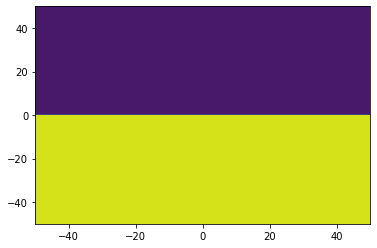

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
N = 2 # number of individual 2D Gaussian Distribution
dist_with_similar_variance = 1 # if euqal to 1 all distributon have varinace 1
                               # otherwise the varinace is chosen randomly
dist_with_random_mean = 0

if dist_with_random_mean:
  mu_X_boundary = 20.                # +/- defines the area for the x/y component of 
  mu_Y_boundary = 20.                # mean of the distribution
  Mu_x = np.random.uniform(-mu_X_boundary, mu_X_boundary, N)
  Mu_y = np.random.uniform(-mu_Y_boundary , mu_Y_boundary, N)
  #Mu= np.vstack((Mu_x, Mu_y))
else:
  Mu_x = np.array([-10, -10])
  Mu_y = np.array([ 10, -10])

# First we use the covariance matrix will be diagonal
# diagonal elements (this make the two Rnadom varianble
# in 2D vector independent)

if dist_with_similar_variance:
  sigma = 1.0
  Sigma = np.ones(N)*sigma
else:
  Sigma = np.array([6.8,6.8])
#define the area with number of grid points
N_grid = 1000

X_boundary = 50.
Y_boundary = 50.
x = np.linspace(-X_boundary,X_boundary,N_grid)
y = np.linspace(-Y_boundary,Y_boundary,N_grid)
h=np.zeros([len(x), len(y)])
for i in np.arange(len(x)):
  for j in np.arange(len(y)):
    temp  = 0
    max = -1e20
    for n in np.arange(N):
      aaa = - np.log(2*np.pi) - 1/2*np.log(np.square(np.square(Sigma[n])))
      metric = aaa - 1/np.square(Sigma[n])*(np.square(x[i] - Mu_x[n]) + np.square(y[j]-Mu_y[n]))/2
      if metric > max:
        max = metric
        h[j,i] = n+1

cs = plt.contourf(x, y,h)

###That was awful
Although you are not graded for  the quality of the code you write, your solution becomes very slow. You get the HW right but you don't get the speed you need. 
###However, for your job interview, you might want to learn writing faster codes.


### Explanation
Fron now on I try to avoid for loops as much as I can. 
### I am not a good programmer so you should (not for HW but for your future job interviews) try to do better or at least understand the code I write

Please remeber the code quality is not part of your HW and only the results are used for the garde.

### Explanation 
Now we swicth to a more efficient code

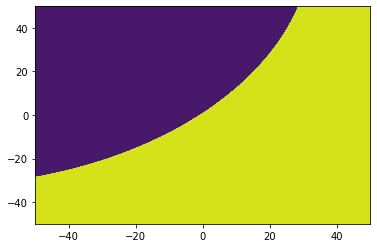

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 2 # number of individual 2D Gaussian Distribution
dist_with_similar_variance = 0 # if euqal to 1 all distributon have varinace 1
                               # otherwise the varinace is chosen randomly
dist_with_random_mean = 0

equi_probable = 1

if equi_probable:
  prob = np.ones(N) *1/N
else:
  prob = np.array([0.999, 0.001])


if dist_with_random_mean:
  mu_X_boundary = 20.                # +/- defines the area for the x/y component of 
  mu_Y_boundary = 20.                # mean of the distribution
  Mu_x = np.random.uniform(-mu_X_boundary, mu_X_boundary, N)
  Mu_y = np.random.uniform(-mu_Y_boundary , mu_Y_boundary, N)
  #Mu= np.vstack((Mu_x, Mu_y))
else:
  Mu_x = np.array([-10, 10])
  Mu_y = np.array([ 10, -10])

# First we use the covariance matrix will be diagonal
# diagonal elements (this make the two Rnadom varianble
# in 2D vector independent)

if dist_with_similar_variance:
  sigma = 10
  Sigma = np.ones(N)*sigma
else:
  Sigma = np.array([6.,6.8])
#define the area with number of grid points
N_grid = 1000

X_boundary = 50.
Y_boundary = 50.

resolution = .1
x_min, x_max = -X_boundary, X_boundary
y_min, y_max = -Y_boundary, Y_boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
h = 0*xx

max = np.ones(xx.shape)* (-1e20)
# for defining the regions.
for n in np.arange(N):
      metric = np.log(prob[n]) -  np.log(2*np.pi) -1/2*np.log(np.square(np.square(Sigma[n]))) - 1/np.square(Sigma[n]) \
      *(np.square(xx - Mu_x[n]) + np.square(yy-Mu_y[n]))/2
      h  = h* ((metric<max) *1.) + ((metric >= max) *1.) *(n+1)  
      max = max * ((metric<max)*1.) + ((metric >= max)*1.) *metric
plt.contourf(xx[0,:],yy[:,0],h)


### Comment

Here we plot some samples of the randmom variables on the area where the decision boundaries are plotted. Please convince yourself that this makes sense.

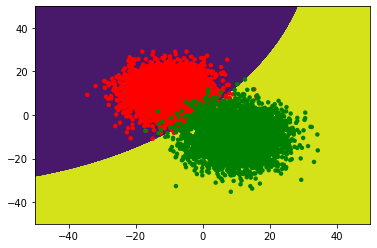

In [ ]:
resolution = .1
x_min, x_max = -X_boundary , X_boundary 
y_min, y_max = -Y_boundary , Y_boundary 
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
h = 0*xx

max = np.ones(xx.shape)* (-1e20)

for n in np.arange(N):
      metric = np.log(prob[n]) - 1/2* np.log(2*np.pi*np.square(np.square(Sigma[n]))) - 1/np.square(Sigma[n]) \
      *(np.square(xx - Mu_x[n]) + np.square(yy-Mu_y[n]))/2
      h  = h* ((metric<max) *1.) + ((metric >= max) *1.) *(n+1)  
      max = max * ((metric<max)*1.) + ((metric >= max)*1.) *metric
plt.contourf(xx[0,:],yy[:,0],h[:, :])
color = 'r' + 'g' 

# This is for plotting the points
for n in np.arange(N):
  # here we are going to cheat and deterministcally generate proportional 
  # number of random variables.
  # this is proportional to the probability of each category
  MM = int(np.round(prob[n]*10000))
  x = np.random.normal(np.array([Mu_x[n],Mu_y[n]]), Sigma[n], (MM,2))

  plt.scatter(
    x[:, 0],
    x[:, 1],
    s=20,
    linewidth=1,
    facecolors=color[n],
    edgecolors="none",
    ) 


# Problem 1 (11 points)
Without changing the parameters of the above program calculate the probability of error. In other words:



*    $ {\mu_X}_1 = 
  \begin{bmatrix} -10 \\10 
  \end{bmatrix}
$  and $ {\mu_X}_2 = 
  \begin{bmatrix} 10 \\-10 
  \end{bmatrix}
$ 

* $
\Sigma_1 =  \Sigma_2  = \begin{bmatrix}
    10^2 & 0  \\ 
    0 & 10^2 
 \end{bmatrix}
$


*   $P(\Gamma = 1)= P(\Gamma = 2) =1/2$.


The decision boundary is set by the formulas that are given in the body of this problem and discussed in the class. 

Remember:

$$
Prob(error) = \sum_{i=1}^2 p(error | \Gamma =i) P(\Gamma = i)
$$

## Hint

You can use the program similar to the one that plots the sample points to count the number of ponts that fall in the proper region and the ones that fall in the wrong region and then use the proportion to calculate the probability of error.

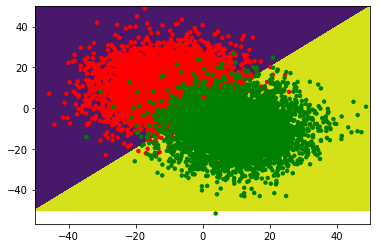

In [ ]:
# SOLUTION 1

import numpy as np
import matplotlib.pyplot as plt
N = 2 # number of individual 2D Gaussian Distribution
dist_with_similar_variance = 0 # if euqal to 1 all distributon have varinace 1
                               # otherwise the varinace is chosen randomly
dist_with_random_mean = 0

equi_probable = 1 # KEEPING IT 1 FOR EQUAL PROBABILITY OF (0.5) P(Γ=1)=P(Γ=2)=1/2.

if equi_probable:
  prob = np.ones(N) *1/N
else:
  prob = np.array([0.999, 0.001])


if dist_with_random_mean:
  mu_X_boundary = 20.                # +/- defines the area for the x/y component of 
  mu_Y_boundary = 20.                # mean of the distribution
  Mu_x = np.random.uniform(-mu_X_boundary, mu_X_boundary, N)
  Mu_y = np.random.uniform(-mu_Y_boundary , mu_Y_boundary, N)
  #Mu= np.vstack((Mu_x, Mu_y))
else:
  Mu_x = np.array([-10, 10])
  Mu_y = np.array([ 10, -10])

# First we use the covariance matrix will be diagonal
# diagonal elements (this make the two Rnadom varianble
# in 2D vector independent)

if dist_with_similar_variance:
  sigma = 10
  Sigma = np.ones(N)*sigma
else:
  Sigma = np.array([10,10]) # CHANGING THE VARIANCE TO [10,10] AS PER THE QUESTION
#define the area with number of grid points
N_grid = 1000

X_boundary = 50.
Y_boundary = 50.


resolution = .1
x_min, x_max = -X_boundary , X_boundary 
y_min, y_max = -Y_boundary , Y_boundary 
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
h = 0*xx


max = np.ones(xx.shape)* (-1e20)

for n in np.arange(N):
      metric = np.log(prob[n]) - 1/2* np.log(2*np.pi*np.square(np.square(Sigma[n]))) - 1/np.square(Sigma[n]) \
      *(np.square(xx - Mu_x[n]) + np.square(yy-Mu_y[n]))/2
      h  = h* ((metric<max) *1.) + ((metric >= max) *1.) *(n+1)  
      max = max * ((metric<max)*1.) + ((metric >= max)*1.) *metric
plt.contourf(xx[0,:],yy[:,0],h[:, :])
color = 'r' + 'g' 

li_green = []
li_red = []

# This is for plotting the points
for n in np.arange(N):
  # here we are going to cheat and deterministcally generate proportional 
  # number of random variables.
  # this is proportional to the probability of each category
  MM = int(np.round(prob[n]*10000))
  x = np.random.normal(np.array([Mu_x[n],Mu_y[n]]), Sigma[n], (MM,2))
  if n:
    li_green = x
  else:
    li_red = x
  plt.scatter(
    x[:, 0],
    x[:, 1],
    s=20,
    linewidth=1,
    facecolors=color[n],
    edgecolors="none",
    ) 


# --------------- MY SOLUTION STARTS HERE -------------------------------------------
'''
The random generated points above are first created for W1 and then for W2, so to identify 
where the point lies, we have to take out the conditional probability with the formula given above.
ln(p(X|Γ=i)) = =−ln(2π)−1/2ln(σ4i)−1/2∗((x1−μx1,i)2+(x2−μx2,i)2σ2i), in this way we will be able to
calculate the probability of the point, and as it is first generated for red point, if the probability 
of point is greater than that for probability conditions used to measure green points with the same points,
then it lies in the same region else is an outlier.
'''

#Comparing the probability P(W1 | X) > P(W2 | X ) for W1 assuming x lies in purple region, else its an error.

prob_r = np.log(prob[0])  -1/2* np.log(2*np.pi*np.square(np.square(Sigma[0]))) - 1/np.square(Sigma[0]) \
        *(np.square(li_red[:,0] - Mu_x[0]) + np.square(li_red[:,1] - Mu_y[0]))/2

prob_rg =  np.log(prob[1]) -1/2* np.log(2*np.pi*np.square(np.square(Sigma[1]))) - 1/np.square(Sigma[1]) \
        *(np.square(li_red[:,0] - Mu_x[1]) + np.square(li_red[:,1] - Mu_y[1]))/2

# Comparing the probability P(W1 | X) < P(W2 | X ) for W2 assuming x lies in purple region, else its an error.

prob_g = np.log(prob[0])  -1/2* np.log(2*np.pi*np.square(np.square(Sigma[0]))) - 1/np.square(Sigma[0]) \
        *(np.square(li_green[:,0] - Mu_x[0]) + np.square(li_green[:,1] - Mu_y[0]))/2

prob_gr =  np.log(prob[1]) -1/2* np.log(2*np.pi*np.square(np.square(Sigma[1]))) - 1/np.square(Sigma[1]) \
        *(np.square(li_green[:,0] - Mu_x[1]) + np.square(li_green[:,1] - Mu_y[1]))/2


In [ ]:
# counting error points
red_error = 0
green_error = 0 
p = []
p1 = []
error_r = []
error_g = []
for i in range(len(prob_r)):
  if(prob_r[i] < prob_rg[i]):
  #if(h_r[i] < h_rg[i]):
    p.append(li_red[i])
    red_error +=1
    error_r.append(prob_rg[i])

for i in range(len(prob_g)):
  if(prob_g[i] > prob_gr[i]):
  #if(h_g[i] > h_gr[i]):
    p1.append(li_green[i])
    green_error +=1
    error_g.append(prob_gr[i])

print("red error points:",p)
print("green error point:",p1)
print("red error count:",red_error)
print("green error count:",green_error)

red error points: [array([ 2.82597996, -1.59181821]), array([-9.01022314, -9.32492194]), array([-1.71625702, -5.36824708]), array([18.42619017,  6.60435904]), array([ -8.12556636, -10.24268973]), array([15.36980775, 11.36017764]), array([13.15520353,  3.91801192]), array([-1.75434397, -2.1447607 ]), array([-2.7163424 , -5.41150775]), array([ -3.38308912, -17.92605328]), array([-3.28307582, -3.77731819]), array([ 1.73041872, -2.81783815]), array([ 1.43385467, -3.61712068]), array([ 4.96769631, -3.27211124]), array([8.19001241, 7.72291284]), array([ -4.70654535, -10.60422656]), array([ -0.17677035, -14.00331363]), array([10.84793733, -1.80445972]), array([18.67094192,  9.55900909]), array([ 6.04380677, -0.12866021]), array([ 1.95114094, -2.42944781]), array([2.38200517, 0.63695414]), array([ 4.26971594, -1.17057681]), array([9.94942932, 4.09565207]), array([-0.47058244, -5.20470101]), array([7.34795344, 4.98871882]), array([-3.84587633, -7.47123094]), array([-3.80317351, -5.99900829]), a

In [ ]:
# Calculating P(error) = ∑p(error|Γ=i)P(Γ=i)
prob_err_r = 0
prob_err_g = 0
# NOTE FOR MYSEFL:
# incorrect assumption, the formula doesnt state overall summation of probabilistic errors but, sum of points in wrong region/ total points.
# error points calculated correctly, but probability calculation take attention.
# # For red region

# for i in range(len(error_r)):
#   prob_err_r += error_r[i] * prob[0] 

# # For green region

# for i in range(len(error_g)):
#   prob_err_g += error_g[i] * prob[1]

# made a correction, the probability points were added incorrectly.
print("RED region",red_error/MM)
print("GREEN region",green_error/MM)
# print("Probability error in RED region: ",abs(prob_err_r/MM))
# print("Probability error in GREEN region: ",abs(prob_err_g/MM))
print((red_error*prob[0] + green_error*prob[1])/MM)

RED region 0.0746
GREEN region 0.082
0.0783


# Problem 2 (9 points)

Calculate the probability of error for the following cases

*   (3 points) Change the mean $ {\mu_X}_1 = 
  \begin{bmatrix} -20 \\0 
  \end{bmatrix}
$  and $ {\mu_X}_2 = 
  \begin{bmatrix} 20 \\0 
  \end{bmatrix}
$ 
*   (3 points) Change the $\Sigma_i$ to variance to $$ 
\Sigma_1 =  \begin{bmatrix}
    6^2 & 0  \\ 
    0 & 6^2 
 \end{bmatrix}
$$
and

$$
 \Sigma_2 =  \begin{bmatrix}
    6.8^2 & 0  \\ 
    0 & 6.8^2 
 \end{bmatrix}
$$


*   (3 points) Change $P(\Gamma = 1) = 0.999$ and $P(\Gamma = 2) = 0.001$.




In [ ]:
'''
  # PROBLEM 2
    Part - 1

    Ux1 = [-20, 0] Ux2 = [20, 0]
    sigma = [6^2  0]
            [0  6^2]
    P(Γ = 1) = 0.999 and P(Γ = 2) = 0.001

'''

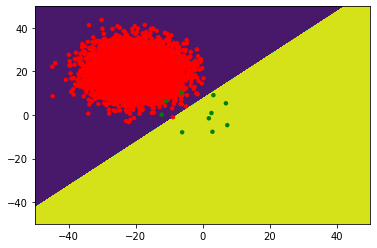

In [ ]:
# SOLUTION - 2

import numpy as np
import matplotlib.pyplot as plt

N = 2 # number of individual 2D Gaussian Distribution

dist_with_similar_variance = 0 # if euqal to 1 all distributon have varinace 1
                               # otherwise the varinace is chosen randomly
dist_with_random_mean = 0

# SET AS ZERP SO THAT THE PROB VALUES ARE([0.999, 0.001])
equi_probable = 0

if equi_probable:
  prob = np.ones(N) *1/N
else:
  prob = np.array([0.999, 0.001])


if dist_with_random_mean:
  mu_X_boundary = 20.                # +/- defines the area for the x/y component of 
  mu_Y_boundary = 20.                # mean of the distribution
  Mu_x = np.random.uniform(-mu_X_boundary, mu_X_boundary, N)
  Mu_y = np.random.uniform(-mu_Y_boundary , mu_Y_boundary, N)
  #Mu= np.vstack((Mu_x, Mu_y))
else:
  Mu_x = np.array([-20, 0])
  Mu_y = np.array([ 20, 0])

# First we use the covariance matrix will be diagonal
# diagonal elements (this make the two Rnadom varianble
# in 2D vector independent)

if dist_with_similar_variance:
  sigma = 10
  Sigma = np.ones(N)*sigma
else:
  Sigma = np.array([6,6])  # SET VARIANCE AS [(6,6)]

#define the area with number of grid points

N_grid = 1000

X_boundary = 50.
Y_boundary = 50.

resolution = .1
x_min, x_max = -X_boundary, X_boundary
y_min, y_max = -Y_boundary, Y_boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
h = 0*xx
max = np.ones(xx.shape)* (-1e20)

# for defining the regions.
for n in np.arange(N):
      metric = np.log(prob[n]) -  np.log(2*np.pi) -1/2*np.log(np.square(np.square(Sigma[n]))) - 1/np.square(Sigma[n]) \
      *(np.square(xx - Mu_x[n]) + np.square(yy-Mu_y[n]))/2
      h  = h* ((metric<max) *1.) + ((metric >= max) *1.) *(n+1)  
      max = max * ((metric<max)*1.) + ((metric >= max)*1.) *metric
plt.contourf(xx[0,:],yy[:,0],h)

# code for plotting the points

color = 'r' + 'g' 

li_green1 = []
li_red1 = []

# This is for plotting the points
for n in np.arange(N):
  # here we are going to cheat and deterministcally generate proportional 
  # number of random variables.
  # this is proportional to the probability of each category
  MM = int(np.round(prob[n]*10000))
  x = np.random.normal(np.array([Mu_x[n],Mu_y[n]]), Sigma[n], (MM,2))
  if n:
    li_green1 = x
  else:
    li_red1 = x
  plt.scatter(
    x[:, 0],
    x[:, 1],
    s=20,
    linewidth=1,
    facecolors=color[n],
    edgecolors="none",
    ) 


In [ ]:
# SOLUTION -- code starts here --
prob_r1 =  np.log(prob[0]) -1/2* np.log(2*np.pi*np.square(np.square(Sigma[0]))) - 1/np.square(Sigma[0]) *(np.square(li_red1[:,0] - Mu_x[0]) + np.square(li_red1[:,1] - Mu_y[0]))/2

prob_rg1 = np.log(prob[1])  -1/2* np.log(2*np.pi*np.square(np.square(Sigma[1]))) - 1/np.square(Sigma[1]) *(np.square(li_red1[:,0] - Mu_x[1]) + np.square(li_red1[:,1] - Mu_y[1]))/2

prob_g1 = np.log(prob[0])  -1/2* np.log(2*np.pi*np.square(np.square(Sigma[0]))) - 1/np.square(Sigma[0]) *(np.square(li_green1[:,0] - Mu_x[0]) + np.square(li_green1[:,1] - Mu_y[0]))/2

prob_gr1 = np.log(prob[1])  -1/2* np.log(2*np.pi*np.square(np.square(Sigma[1]))) - 1/np.square(Sigma[1]) *(np.square(li_green1[:,0] - Mu_x[1]) + np.square(li_green1[:,1] - Mu_y[1]))/2

red_error = 0
green_error = 0 
p = []
p1 = []
error_r = []
error_g = []
for i in range(len(prob_r1)):
  if(prob_r1[i] < prob_rg1[i]):
    p.append(li_red1[i])
    red_error +=1
    error_r.append(prob_rg1[i])

for i in range(len(prob_g1)):
  if(prob_g1[i] > prob_gr1[i]):
    p1.append(li_green1[i])
    green_error +=1
    error_g.append(prob_gr1[i])

print("red error points:",p)
print("green error point:",p1)
print("red error count:",red_error)
print("green error count:",green_error)

# Calculating P(error) = ∑p(error|Γ=i)P(Γ=i)

# prob_err_r = 0
# prob_err_g = 0

# for i in range(len(error_r)):
#   prob_err_r += error_r[i] * prob[0]

# for i in range(len(error_g)):
#   prob_err_g += error_g[i] * prob[1] 


# made a correction, the probability points were added incorrectly.
print("RED region",red_error/MM)
print("GREEN region",green_error/MM)
# print("Probability error in RED region: ",abs(prob_err_r/MM))
# print("Probability error in GREEN region: ",abs(prob_err_g/MM))
print((red_error*prob[0] + green_error*prob[1])/MM)

red error points: []
green error point: [array([-10.87942768,   6.37623091]), array([-12.2521437 ,   0.16534549]), array([-6.42839143, 10.32611383])]
red error count: 0
green error count: 3
RED region 0.0
GREEN region 0.3
0.00030000000000000003


In [ ]:
'''
  # PROBLEM 2
    Part - 2

    Ux1 = [-20, 0] Ux2 = [20, 0]
    sigma = [6.8^2  0]
            [0  6.8^2]
    P(Γ = 1) = 0.999 and P(Γ = 2) = 0.001

'''

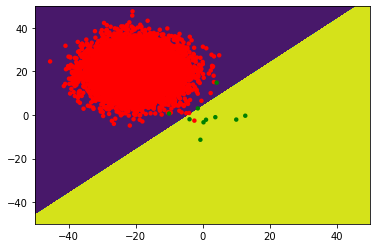

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 2 # number of individual 2D Gaussian Distribution

dist_with_similar_variance = 0 # if euqal to 1 all distributon have varinace 1
                               # otherwise the varinace is chosen randomly
dist_with_random_mean = 0

# SET AS ZERP SO THAT THE PROB VALUES ARE([0.999, 0.001])
equi_probable = 0

if equi_probable:
  prob = np.ones(N) *1/N
else:
  prob = np.array([0.999, 0.001])


if dist_with_random_mean:
  mu_X_boundary = 20.                # +/- defines the area for the x/y component of 
  mu_Y_boundary = 20.                # mean of the distribution
  Mu_x = np.random.uniform(-mu_X_boundary, mu_X_boundary, N)
  Mu_y = np.random.uniform(-mu_Y_boundary , mu_Y_boundary, N)
  #Mu= np.vstack((Mu_x, Mu_y))
else:
  Mu_x = np.array([-20, 0])
  Mu_y = np.array([ 20, 0])

# First we use the covariance matrix will be diagonal
# diagonal elements (this make the two Rnadom varianble
# in 2D vector independent)

if dist_with_similar_variance:
  sigma = 10
  Sigma = np.ones(N)*sigma
else:
  Sigma = np.array([6.8,6.8])  # SET VARIANCE AS [(6.8,6.8)]

#define the area with number of grid points

N_grid = 1000

X_boundary = 50.
Y_boundary = 50.

resolution = .1
x_min, x_max = -X_boundary, X_boundary
y_min, y_max = -Y_boundary, Y_boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
h = 0*xx
max = np.ones(xx.shape)* (-1e20)

# for defining the regions.
for n in np.arange(N):
      metric = np.log(prob[n]) -  np.log(2*np.pi) -1/2*np.log(np.square(np.square(Sigma[n]))) - 1/np.square(Sigma[n]) \
      *(np.square(xx - Mu_x[n]) + np.square(yy-Mu_y[n]))/2
      h  = h* ((metric<max) *1.) + ((metric >= max) *1.) *(n+1)  
      max = max * ((metric<max)*1.) + ((metric >= max)*1.) *metric
plt.contourf(xx[0,:],yy[:,0],h)

# code for plotting the points

color = 'r' + 'g' 

li_green1 = []
li_red1 = []

# This is for plotting the points
for n in np.arange(N):
  # here we are going to cheat and deterministcally generate proportional 
  # number of random variables.
  # this is proportional to the probability of each category
  MM = int(np.round(prob[n]*10000))
  x = np.random.normal(np.array([Mu_x[n],Mu_y[n]]), Sigma[n], (MM,2))
  if n:
    li_green1 = x
  else:
    li_red1 = x
  plt.scatter(
    x[:, 0],
    x[:, 1],
    s=20,
    linewidth=1,
    facecolors=color[n],
    edgecolors="none",
    ) 

In [ ]:
# SOLUTION -- code starts here --
prob_r1 = np.log(prob[0])  -1/2* np.log(2*np.pi*np.square(np.square(Sigma[0]))) - 1/np.square(Sigma[0]) \
        *(np.square(li_red1[:,0] - Mu_x[0]) + np.square(li_red1[:,1] - Mu_y[0]))/2

prob_rg1 = np.log(prob[1])  -1/2* np.log(2*np.pi*np.square(np.square(Sigma[1]))) - 1/np.square(Sigma[1]) \
        *(np.square(li_red1[:,0] - Mu_x[1]) + np.square(li_red1[:,1] - Mu_y[1]))/2

prob_g1 = np.log(prob[0])  -1/2* np.log(2*np.pi*np.square(np.square(Sigma[0]))) - 1/np.square(Sigma[0]) \
        *(np.square(li_green1[:,0] - Mu_x[0]) + np.square(li_green1[:,1] - Mu_y[0]))/2

prob_gr1 = np.log(prob[1])  -1/2* np.log(2*np.pi*np.square(np.square(Sigma[1]))) - 1/np.square(Sigma[1]) \
        *(np.square(li_green1[:,0] - Mu_x[1]) + np.square(li_green1[:,1] - Mu_y[1]))/2

red_error1 = 0
green_error1 = 0 
p_1 = []
p1_1 = []
error_r = []
error_g = []
for i in range(len(prob_r1)):
  if(prob_r1[i] < prob_rg1[i]):
    p_1.append(li_red1[i])
    red_error1 +=1
    error_r.append(prob_rg1[i])

for i in range(len(prob_g1)):
  if(prob_g1[i] > prob_gr1[i]):
    p1_1.append(li_green1[i])
    green_error1 +=1
    error_g.append(prob_gr1[i])

print("red error points:",p_1)
print("green error point:",p1_1)
print("red error count:",red_error1)
print("green error count:",green_error1)

# Calculating P(error) = ∑p(error|Γ=i)P(Γ=i)

prob_err_r = 0
prob_err_g = 0

# for i in range(len(error_r)):
#   prob_err_r += error_r[i]*prob[0] 
# for i in range(len(error_g)):
#   prob_err_g += error_g[i]*prob[1] 

# # made correction, the whole probability was not divided with total.
# print("Probability error in RED region: ",abs(prob_err_r)/MM)
# print("Probability error in GREEN region: ",abs(prob_err_g)/MM)

# made a correction, the probability points were added incorrectly.
print("RED region",red_error1/MM)
print("GREEN region",green_error1/MM)
# print("Probability error in RED region: ",abs(prob_err_r/MM))
# print("Probability error in GREEN region: ",abs(prob_err_g/MM))
print((red_error1*prob[0] + green_error1*prob[1])/MM)

red error points: [array([-2.50054739, -2.59763883])]
green error point: [array([-10.05588643,   0.65796347]), array([ 4.14664793, 14.82871081]), array([-1.48714415,  3.02809366])]
red error count: 1
green error count: 3
RED region 0.1
GREEN region 0.3
0.1002
